---

# Exercises - Gradient Descent

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data points for a Regression problem

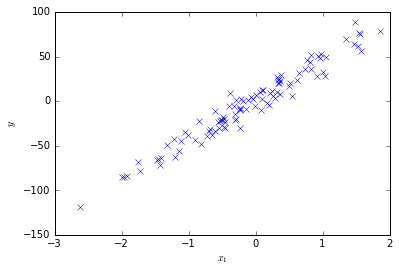

In [2]:
from sklearn import datasets

X, y = datasets.make_regression(n_samples=100, n_features=1,
                                n_informative=1, noise=10.0,
                                random_state=42)
plot(X, y, 'bx')
xlabel('$x_1$')
ylabel("$y$");

### Let's prepare the data points for matrix manipulation:

In [ ]:
X_ext = insert(X, 0, ones(len(X)), axis=1)
Y = y.reshape(len(y), 1)

## Solution 1. Ordinary Least Squares

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement Linear Regression and use the Ordinary Least Squares (OLS) closed-form expression to find the estimated values of $\mathbf{w}$:

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

In [ ]:
W = np.linalg.inv(X_ext.T.dot(X_ext)).dot(X_ext.T).dot(Y)
W

In [ ]:
plot(X, y, 'bx')
plot(X, X_ext.dot(W), 'r.')
xlabel('$x_1$')
ylabel("$y$");

## Solution 2: Batch Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Batch Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \left(\left(\mathbf{X}\mathbf{w} - \mathbf{y}\right)^T\mathbf{X}_i\right)$$

In [ ]:
n, d = X_ext.shape
s = 100 # learning steps
alpha = 0.01 # learning rate

W = zeros((d, 1))

for step in range(s):
    grad = (X_ext.dot(W) - Y).T.dot(X_ext).T
    W = W - alpha * grad
    print np.linalg.norm(grad)
    if np.linalg.norm(grad) < 1e-4:
        break

print W

plot(X, y, 'bx')
plot(X, X_ext.dot(W), 'r.')
xlabel('$x_1$')
ylabel("$y$");

## Solution 3: Stochastic Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Stochastic Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.
In each step, iterate through all $j$ samples and, for each sample, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha\left(\mathbf{X}^{(j)}\mathbf{w} - \mathbf{y}^{(j)}\right)\mathbf{X}^{(j)}_i$$

In [ ]:
n, d = X_ext.shape
s = 20 # learning steps
alpha = 0.1 # learning rate

W = zeros((d, 1))

for step in range(s):
    for j in range(n):
        grad = (X_ext[j].dot(W) - Y[j]).T.dot(X_ext[[j], :].reshape(1,d)).reshape(d,1)
        W -= alpha * grad

print W

plot(X, y, 'bx')
plot(X, X_ext.dot(W), 'r.')
xlabel('$x_1$')
ylabel("$y$");

# Solution 4: Gradient Descent with Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
# model inputs: X and Y
x_tensor = tf.placeholder(tf.float32)
y_tensor = tf.placeholder(tf.float32)

# define the model variables
w_tensor = tf.Variable(np.zeros((X.shape[1], 1)), dtype=tf.float32)
b_tensor = tf.Variable([0], dtype=tf.float32)

# loss function to minimize: 1/n * (x.dot(w) + b - y)^2
y_pred = tf.matmul(x_tensor, w_tensor) + b_tensor
loss = tf.reduce_mean(tf.square(y_pred - y_tensor))

# define the gradient descent step
learning_rate = 0.5
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

feed_dict = {x_tensor: X, y_tensor: Y}

# initialize session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

try:
    
    for i in range(10):
        sess.run(train_step, feed_dict=feed_dict)
        print sess.run(loss, feed_dict=feed_dict)

finally:
    # collect results
    W = sess.run(w_tensor, feed_dict=feed_dict)
    B = sess.run(b_tensor, feed_dict=feed_dict)
    sess.close()

print W, B

plot(X, y, 'bx')
plot(X, X.dot(W)+B, 'r.')
xlabel('$x_1$')
ylabel("$y$");